# Transfer Learning with TensorFlow Part 2 : Fine-Tunning
In the previous note learn to transfer learning feature extrection and this note book learn transfer learning differnt part Fine-Tunning


In [ ]:
!wget "https://raw.githubusercontent.com/iamzen24/course_project/main/halper_function.py"

--2022-05-08 14:16:22--  https://raw.githubusercontent.com/iamzen24/course_project/main/halper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10235 (10.0K) [text/plain]
Saving to: ‘halper_function.py’

halper_function.py  100%[===================>]  10.00K  --.-KB/s    in 0s      

2022-05-08 14:16:22 (77.1 MB/s) - ‘halper_function.py’ saved [10235/10235]



In [ ]:
from halper_function import plot_loss_curves,load_and_prep_image,create_tensorboard_callback,unzip_data,walk_through_dir

> **🔑Note:**  If you're running this notebook in Google Colab, when it times out Colab will delete helper_functions.py, so you'll have to redownload it if you want access to your helper functions.



# Let's more data
This time we're going to see how we can use pretrained model using `tf.keras.applications` and apply them our won problem (food recogines.)
tensorflow aplication link is :https://www.tensorflow.org/api_docs/python/tf/keras/applications 

In [ ]:
# download data unzip data
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"

unzip_data(filename="10_food_classes_10_percent.zip")

--2022-05-08 14:16:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 142.251.5.128, 2a00:1450:400c:c1b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  55.2MB/s    in 2.9s    

2022-05-08 14:16:36 (55.2 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# check out how many directory are how many image have each of this
walk_through_dir(dir_path="10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [ ]:
# setup train and test directory path
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf  
IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE,
                                                                            label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")


Found 750 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
# check out class names our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# see an exmple of a batch of data
for image,label in train_data_10_percent.take(1):
    print(image,label)

tf.Tensor(
[[[[5.59591827e+01 3.93163261e+01 1.33163271e+01]
   [5.34489784e+01 3.61632652e+01 1.18061228e+01]
   [5.48622475e+01 3.55000000e+01 1.35000010e+01]
   ...
   [1.44091782e+02 1.33096939e+02 1.59372574e+02]
   [1.19152679e+02 1.17530312e+02 1.64790710e+02]
   [1.64474274e+02 1.71275269e+02 2.31632401e+02]]

  [[6.28571434e+01 3.71428566e+01 1.40714283e+01]
   [6.29285736e+01 3.62857132e+01 1.51428566e+01]
   [6.54846954e+01 3.79438744e+01 1.68571434e+01]
   ...
   [1.17607307e+02 1.04979813e+02 1.20479897e+02]
   [1.50969727e+02 1.47689209e+02 1.78674042e+02]
   [1.49780624e+02 1.53852051e+02 1.95469376e+02]]

  [[7.05051041e+01 3.75051003e+01 1.85051022e+01]
   [6.95000000e+01 3.60714302e+01 1.70714302e+01]
   [6.87091827e+01 3.37091827e+01 1.47091837e+01]
   ...
   [1.17882622e+02 1.01265320e+02 1.10199020e+02]
   [1.19336807e+02 1.09464417e+02 1.25081841e+02]
   [1.49765228e+02 1.46826447e+02 1.67397858e+02]]

  ...

  [[4.59897690e+01 3.19897671e+01 5.77550411e+00]
   [4

## model 0 - Build Transfer learning  using tensorflow functional API
Sequential api straight-forward it runs our layers in Sequential order
Functional api is flaxible our model

In [ ]:
# 1. create the model writing functional api type
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
# 2. Frezze the  base model ( so the underlying pretrained model no changed training time)
base_model.trainable = False

# 3. input shape our model 
inputs = tf.keras.Input(shape=(224,224,3),name="inputs_layer")

# 4. normailize our data a model Resnet (not important our efficient model alredy rescale process have)
# x = tf.keras.experimental.preprocessing.Rescaling(1/255.)(inputs)
# 5 pass thorugh input our base model
x = base_model(inputs)
print(f"Shape after pass the  base model: {x.shape} ")
# 6 Average pool the outputs of the base model (aggregate all the most important infromation, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="AvaragePooling2D")(x)
print(f"Shape after pass the averagePooling2D: {x.shape}")
# 7 output shape our model
outputs = tf.keras.layers.Dense(10,activation="softmax",name="ouput_shape")(x)
# 8 combine input and output our model
model_0 = tf.keras.Model(inputs,outputs)
# 9 compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 10 fit the model
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback("transfer_learning","feature_extraction")])

16719872/16705208 [==============================] - 0s 0us/step
Shape after pass the  base model: (None, 7, 7, 1280) 
Shape after pass the averagePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/feature_extraction/20220508-141653
Epoch 1/5
24/24 [==============================] - 38s 431ms/step - loss: 1.9301 - accuracy: 0.3733 - val_loss: 1.4054 - val_accuracy: 0.6615
Epoch 2/5
24/24 [==============================] - 7s 262ms/step - loss: 1.1646 - accuracy: 0.7307 - val_loss: 0.9595 - val_accuracy: 0.7969
Epoch 3/5
24/24 [==============================] - 7s 254ms/step - loss: 0.8541 - accuracy: 0.8040 - val_loss: 0.7809 - val_accuracy: 0.8177
Epoch 4/5
24/24 [==============================] - 6s 235ms/step - loss: 0.7005 - accuracy: 0.8360 - val_loss: 0.6843 - val_accuracy: 0.8177
Epoch 5/5
24/24 [==============================] - 7s 259ms/step - loss: 0.6001 - accuracy: 0.8560 - val_loss: 0.5414 - val_accuracy: 0.9219


In [ ]:
# evaluate test data
model_0.evaluate(test_data)

24/24 [==============================] - 4s 145ms/step - loss: 0.5177 - accuracy: 0.8960


[0.5176687240600586, 0.8960000276565552]

In [ ]:
# check layer our base model
for layer_number,layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
# summary of our base model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
# summary of our model 0 
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_layer (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 AvaragePooling2D (GlobalAve  (None, 1280)             0         
 ragePooling2D)                                                  
                                                                 
 ouput_shape (Dense)         (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


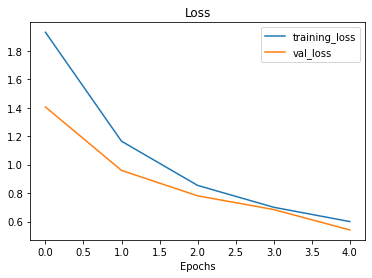

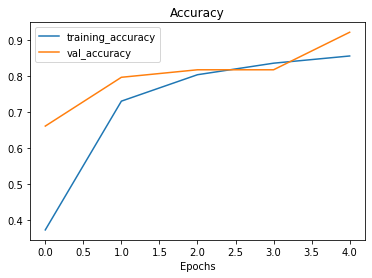

In [ ]:
# plot training and testing data loss curves
plot_loss_curves(history_10_percent)

# Getting a feature vector from a trained model
Let's demonstrate the Global Average Pooling 2D layer...

We have a tensor after our model goes through base_model of shape (None, 7, 7, 1280).

But then when it passes through GlobalAveragePooling2D, it turns into (None, 1280).

Let's use a similar shaped tensor of (1, 4, 4, 3) and then pass it to GlobalAveragePooling2D.



In [ ]:
# create random tensor 
tf.random.set_seed(42)
input_shape = (1,4,4,3)
random_tensor = tf.random.normal(shape=input_shape)
print(f"see look like random tensor: \n{random_tensor}\n")
global_avarege_2D_tensor = tf.keras.layers.GlobalAveragePooling2D()(random_tensor)
print(f"see look like global avarege tensor \n{global_avarege_2D_tensor}\n")
print(f"Shape of the random tensor: {random_tensor.shape}")
print(f"Shape of the global avarege 2D tensor: {global_avarege_2D_tensor.shape}")

see look like random tensor: 
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

see look like global avarege tensor 
[[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of the random tensor: (1, 4, 4, 3)
Shape of the global avarege 2D tensor: (1, 3)


In [ ]:
# look 1,2 index avarege of get same as this code
tf.reduce_mean(input_tensor=random_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

> **🛠 Practice:** Try to do the same with the above two cells but this time use GlobalMaxPool2D... and see what happens.

> **🔑 Note:** One of the reasons feature extraction transfer learning is named how it is is because what often happens is pretrained model outputs a feature vector (a long tensor of numbers which represents the learned representation of the model on a particular sample, in our case, this is the output of the tf.keras.layers.GlobalAveragePooling2D() layer) which can then be used to extract patterns out of for our own specifc problem.



In [ ]:
tf.random.set_seed(42)
print(f"random tensor look like: \n{random_tensor}\n")
global_max_pool_tensor = tf.keras.layers.GlobalMaxPool2D()(random_tensor)
print(f"global max pool tensor look like: \n{global_max_pool_tensor}\n")
print(f"Shape random tensor look like: {random_tensor.shape}")
print(f"Shape global max pool tensor look like: {global_max_pool_tensor.shape}")

random tensor look like: 
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

global max pool tensor look like: 
[[0.9058464 1.1603122 1.6994323]]

Shape random tensor look like: (1, 4, 4, 3)
Shape global max pool tensor look like: (1, 3)


In [ ]:
tf.reduce_max(random_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

## Running a series of transfer learning experiments
We've seen the incredible results transfer learning can get with only 10% of the training data, but how does it go with 1% of the training data... how about we set up a bunch of experiments to find out:

1. `model_1` - use feature extraction transfer learning with 1% of the training data with data augmentation
2. `model_2` - use feature extraction transfer learning with 10% of the training with data augmentaton
3. `model_3` - use fine-tuning transfer learning on 10% of the training data with data augmentation
4. `model_4` - use fine-tuning transfer learning on 100% of the training data with data augmentation
> **🔑 Note:** throughout all experiments the same test dataset will be used to evaluate our model... this ensures consistency across evaluation metrics.




### Getting and preprocessing data for model_1


In [ ]:
# download and uzip data - preprocessing from Food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip 
unzip_data("10_food_classes_1_percent.zip")

--2022-05-08 14:18:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 142.251.5.128, 64.233.184.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  53.0MB/s    in 2.4s    

2022-05-08 14:18:37 (53.0 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
# creating training and test dir 
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [ ]:
# how many directory and image have each of this
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'

In [ ]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32 
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE) # defult is 32
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


 

## Adding data augmentation right into the model
To add data augmentation right into our models, we can use the layers inside:
`tf.keras.layers.experimental.preprocessing()`

we can see the benefits of doing this withing the TensorFlow Data augmentation
documentation: https://www.tensorflow.org/tutorials/images/data_augmentation#use_keras_preprocessing_layers

 Off the top of heads, after reading the docs , the benefits of using data
augmentation inside the model are:
1. Preprocessing of image (augmenting them) happens on the GPU (much faster) rather than the CPU.
2. Image data augmentation only happens during training, so we can still export our whole model and use it elsewhere.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
# Create data augmentation stage with horizontal flipping, rotations, zooms, etc
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip(mode="horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
    # preprocessing.Rescaling(scale=1./255)  set to when you build resnet model but this time efficient net built-in have
],name="data_augmentation")


### Visulize our Data Augmentation layers  (and see what happens)


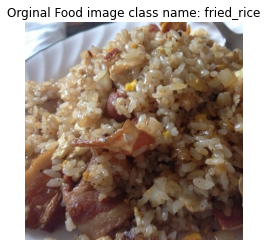

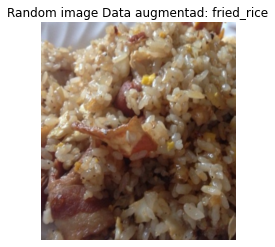

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random 
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_img = random.choice(os.listdir(target_dir))
target_image = target_dir + "/" + random_img

img = mpimg.imread(target_image)

plt.imshow(img)
plt.title(f"Orginal Food image class name: {target_class}")
plt.axis(False);

# data augmentation image show 
image_augmentad = data_augmentation(img,training=True)
plt.figure()
plt.imshow(image_augmentad / 255.)
plt.title(f"Random image Data augmentad: {target_class}")
plt.axis(False);
# print(img)

### Model 1 : Feature Extraction in transfer learning on 1% of data using with data augmentations.

In [ ]:
# setup input shape 
input_shape = (224, 224, 3)
# create base model
base_model_1 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_1.trainable = False 

# create input layer
inputs = layers.Input(shape=input_shape,name="input_layer")

# data augmention
x = data_augmentation(inputs,training=True)

# give the input data not trainable 
x = base_model_1(x,training=False)
print(f" x after base model shape is : {x.shape}")

# pool out of feature vector our base model
x = layers.GlobalAveragePooling2D(name="global_avarege_pooling_layer")(x)

# put dense layer as a output layer
outputs = layers.Dense(10, activation="softmax",name="output_layers")(x)

# Make a model input and output
model_1 = keras.Model(inputs,outputs)

# compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model 1 
model_1_history = model_1.fit(train_data_1_percent,
                epochs=5,
                steps_per_epoch=len(train_data_1_percent),
                validation_data=test_data,
                validation_steps= 0.25 * len(test_data),
                callbacks=[create_tensorboard_callback("tensorflow_hub","Model_1")])

 x after base model shape is : (None, None, None, 1280)
Saving TensorBoard log files to: tensorflow_hub/Model_1/20220508-141847
Epoch 1/5
3/3 [==============================] - 32s 9s/step - loss: 2.4698 - accuracy: 0.0429 - val_loss: 2.3640 - val_accuracy: 0.1125
Epoch 2/5
3/3 [==============================] - 22s 11s/step - loss: 2.1844 - accuracy: 0.1571 - val_loss: 2.2578 - val_accuracy: 0.1594
Epoch 3/5
3/3 [==============================] - 11s 5s/step - loss: 2.0195 - accuracy: 0.2857 - val_loss: 2.1678 - val_accuracy: 0.2250
Epoch 4/5
3/3 [==============================] - 11s 5s/step - loss: 1.8538 - accuracy: 0.4286 - val_loss: 2.0555 - val_accuracy: 0.2766
Epoch 5/5
3/3 [==============================] - 9s 4s/step - loss: 1.6925 - accuracy: 0.6143 - val_loss: 2.0079 - val_accuracy: 0.2891


In [ ]:
# see model summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avarege_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layers (Dense)       (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
# evaluate full version of test data
result_model_1 = model_1.evaluate(test_data)
result_model_1

79/79 [==============================] - 30s 377ms/step - loss: 1.9941 - accuracy: 0.3168


[1.994065761566162, 0.31679999828338623]

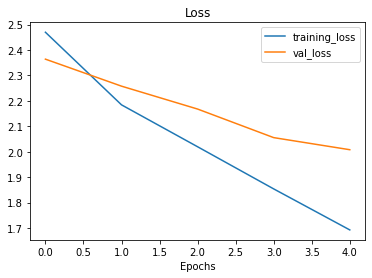

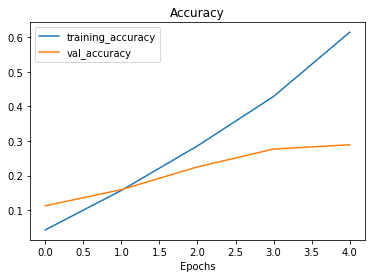

In [ ]:
# see model 1 loss and accuracy using loss curves how do our model?
plot_loss_curves(model_1_history)

### Bulid up Model 2 with data augmentation

In [ ]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"
# Set data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# create model 2 data with data augmentation
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip(mode="horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
    # preprocessing.Rescaling(scale=1./255) # when you use resnet model that time is important efficientNet alredy have this layer
],name="data_augmentation")

In [ ]:
# setup input shape
input_shape = (224,224,3)
# create base model
base_model_2 = keras.applications.EfficientNetB0(include_top=False)
base_model_2.trainable = False
# create input shape
inputs = layers.Input(shape=input_shape,name="inputs_layers")
# data augmentation
x = data_augmentation(inputs,training=True)
# give the input data not trainable
x = base_model_2(x,training=False)
# pooled output feature vector
x = layers.GlobalAveragePooling2D(name="global_avarege_pooling_2D")(x)
# create output layers
outputs = layers.Dense(10,activation="softmax",name="output_layers")(x)
# make our model 
model_2 = keras.Model(inputs,outputs)
# compile the model
model_2.compile(loss=keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


### Creating modle check point call back.

The ModelCheckPoint callback intermidetly saves our model (the full model or just weights) during training.The is useful so we can comes and start where left off.

In [ ]:
checkpoint_path = "ten_percent_model_checkpoint_wegihts/checkpoint.ckpt"

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only = True,
                                                save_best_only=False,
                                                save_freq='epoch',
                                                verbose=1)

In [ ]:
# fit the model
initial_epoch = 5
model_2_history = model_2.fit(train_data_10_percent,
                              epochs=initial_epoch,
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              # track model performance
                              callbacks=[create_tensorboard_callback("tensorflow_hub","model_2_data_aug"),checkpoint])

Saving TensorBoard log files to: tensorflow_hub/model_2_data_aug/20220508-142246
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.3391 - accuracy: 0.6667
Epoch 1: saving model to ten_percent_model_checkpoint_wegihts/checkpoint.ckpt
24/24 [==============================] - 18s 698ms/step - loss: 1.3391 - accuracy: 0.6667 - val_loss: 1.1963 - val_accuracy: 0.7220
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.0453 - accuracy: 0.7400
Epoch 2: saving model to ten_percent_model_checkpoint_wegihts/checkpoint.ckpt
24/24 [==============================] - 16s 643ms/step - loss: 1.0453 - accuracy: 0.7400 - val_loss: 0.9463 - val_accuracy: 0.7714
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.8968 - accuracy: 0.7720
Epoch 3: saving model to ten_percent_model_checkpoint_wegihts/checkpoint.ckpt
24/24 [==============================] - 22s 898ms/step - loss: 0.8968 - accuracy: 0.7720 - val_loss: 0.9033 - val_accuracy: 0.7516
Epoch 4/5


In [ ]:
# what model 0 evaluate result?
model_0.evaluate(test_data)

79/79 [==============================] - 12s 144ms/step - loss: 0.6188 - accuracy: 0.8380


[0.6188307404518127, 0.8379999995231628]

In [ ]:
# Check the model 2 all test evaluate resutl.
model_2_results = model_2.evaluate(test_data)


79/79 [==============================] - 26s 327ms/step - loss: 0.7990 - accuracy: 0.7696


In [ ]:
model_2_results

[0.7989773750305176, 0.769599974155426]

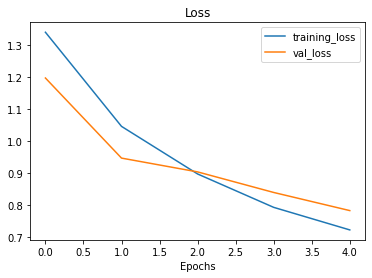

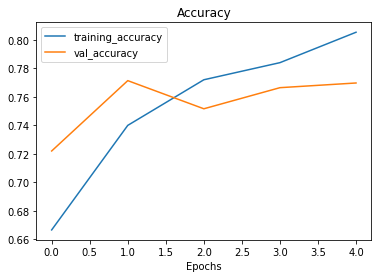

In [ ]:
# plot model 2 history 
plot_loss_curves(model_2_history)

### Loading Check point weights.
Loading model checkpoint and return model specefic checkpoint.

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
# evaluate model 2 with loaded weights.
loaded_checkpoint_weights = model_2.evaluate(test_data)

79/79 [==============================] - 27s 339ms/step - loss: 0.7922 - accuracy: 0.7756


In [ ]:
loaded_checkpoint_weights

[0.7921959757804871, 0.775600016117096]

In [ ]:
# if the resutlt from our previously model 2 the loaded weight as the same worked done!
loaded_checkpoint_weights ==  model_2_results

False

In [ ]:
import numpy as np
np.isclose(np.array(model_2_results),np.array(loaded_checkpoint_weights))

array([False, False])

In [ ]:
print(np.array(model_2_results) - np.array(loaded_checkpoint_weights))

[ 0.0067814  -0.00600004]


### Model 3 : Fine-Tuning are exiciting model on the 10% data

> 🔑 **Note:** Fine-tuning usually works best after training a feature extraction model for a few epochs with large amounts of custom data.

In [ ]:
# layer model 2 
model_2.layers

In [ ]:
# are these layer trainable
for layer in model_2.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fa256a218d0> True
<keras.engine.sequential.Sequential object at 0x7fa2569e2350> True
<keras.engine.functional.Functional object at 0x7fa256546090> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7fa255a73ed0> True
<keras.layers.core.dense.Dense object at 0x7fa2563c8bd0> True


In [ ]:
# what layer are the base model (efficientNetB0 trainable)
for layer_number,layer in enumerate(model_2.layers[2].layers):
    print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# how many trainable our base model
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
# To begin fine-tuning, let's start by setting the last 10 layers of our base_model.trainable = True.
base_model_2.trainable = True

# Freeze all layers except for the last 10
for layer in base_model_2.layers[:-10]:
    layer.trainable = False

# Recompile (we have to recompile our models every time we make a change)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), # when fine-tuning you typically want to lower the learning rate by 10x*
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


> 🔑 **Note:** When using fine-tuning it's best practice to lower your learning rate by some amount. How much? This is a hyperparameter you can tune. But a good rule of thumb is at least 10x (though different sources will claim other values). A good resource for information on this is the ULMFiT paper: https://arxiv.org/abs/1801.06146

In [ ]:
# check how many model_2 layer trainable
for layer in model_2.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fa256a218d0> True
<keras.engine.sequential.Sequential object at 0x7fa2569e2350> True
<keras.engine.functional.Functional object at 0x7fa256546090> True
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7fa255a73ed0> True
<keras.layers.core.dense.Dense object at 0x7fa2563c8bd0> True


In [ ]:
# check how many base model under trainable
for layer_number,layer in enumerate(model_2.layers[2].layers):
    print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# how many trainable veriabel in base model 2
print(len(model_2.trainable_variables))

12


In [ ]:
# fine tunning another 5 epoch
fine_tuning_epoch = initial_epoch + 5

# Refit the model 2 (same as model_2 except more trainable layers)
history_fine_10_percent = model_2.fit(train_data_10_percent,
                                      epochs=fine_tuning_epoch,
                                      validation_data=test_data,
                                      validation_steps=int(0.25 * len(test_data)), # start previouse epoch 
                                      initial_epoch=model_2_history.epoch[-1],
                                      callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",experiment_name="fine_tunning_10_percent_data")])

Saving TensorBoard log files to: tensorflow_hub/fine_tunning_10_percent_data/20220508-150445
Epoch 5/10
24/24 [==============================] - 9s 336ms/step - loss: 0.1528 - accuracy: 0.9533 - val_loss: 0.4147 - val_accuracy: 0.8684
Epoch 6/10
24/24 [==============================] - 8s 339ms/step - loss: 0.1407 - accuracy: 0.9587 - val_loss: 0.3891 - val_accuracy: 0.8701
Epoch 7/10
24/24 [==============================] - 10s 394ms/step - loss: 0.1164 - accuracy: 0.9787 - val_loss: 0.3959 - val_accuracy: 0.8750
Epoch 8/10
24/24 [==============================] - 9s 352ms/step - loss: 0.1033 - accuracy: 0.9760 - val_loss: 0.3562 - val_accuracy: 0.8799
Epoch 9/10
24/24 [==============================] - 11s 430ms/step - loss: 0.1070 - accuracy: 0.9733 - val_loss: 0.4732 - val_accuracy: 0.8635
Epoch 10/10
24/24 [==============================] - 10s 397ms/step - loss: 0.0906 - accuracy: 0.9733 - val_loss: 0.3782 - val_accuracy: 0.8898


In [ ]:
# Evaluate the fine-tuning model (model_3 which is actually model_2 fine-tuning for anothe 5 epoch) 
result_fine_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 21s 259ms/step - loss: 0.7910 - accuracy: 0.7744


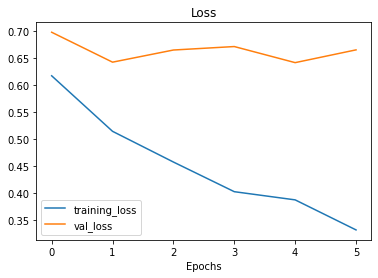

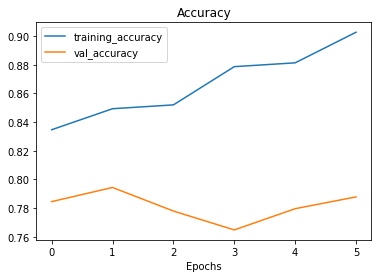

In [ ]:
# plot after fine-tuning model
plot_loss_curves(history_fine_10_percent)


The plot_loss_curves function works great with models which have only been fit once, however, we want somthing to compare one series of running fit() with another (e.g. before and after fine-tuning).

In [ ]:
# Let's create function compare two history
def compare_history(orginal_history,new_history,epochs=5):
    """
    Compare Two TensorFlow history.
    """

    # get orginal histry accuracy and loss curves
    acc = orginal_history.history["accuracy"]
    loss = orginal_history.history["loss"]
    val_acc = orginal_history.history["val_accuracy"]
    val_loss = orginal_history.history["val_loss"]

    # combine original history metric with new history 
    total_acc = acc +  new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # make plot 
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(total_acc,label="Training Accuracy")
    plt.plot(total_val_acc,label="Validation Accuracy")
    plt.plot([initial_epoch - 1 , initial_epoch-1],plt.ylim(),label="start fine tuning")
    plt.legend(loc="lower right")
    plt.title("Training And Validation Accuracy")

    # make plot loss curves
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,2)
    plt.plot(total_loss,label="Training loss ")
    plt.plot(total_val_loss,label="Validation loss")
    plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label="start fine tuning")
    plt.legend(loc="upper right")
    plt.title("Trainig and validation Loss")


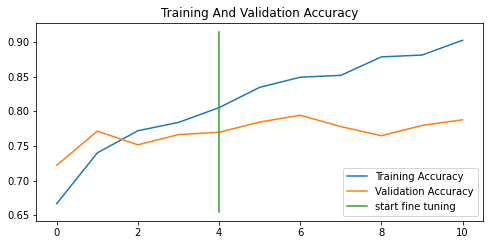

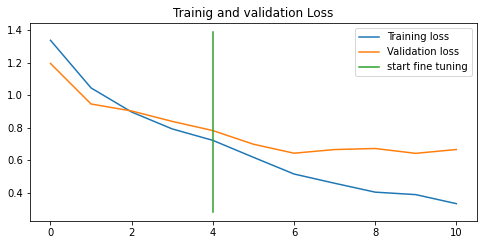

In [ ]:
compare_history(model_2_history,history_fine_10_percent,epochs=10)

###  Model 4 : Fine-Tuning with all data using


In [ ]:
# download data 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# unzip data 
unzip_data(filename="10_food_classes_all_data.zip")

--2022-05-08 14:30:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 173.194.76.128, 142.251.5.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   164MB/s    in 3.0s    

2022-05-08 14:30:47 (164 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
# setup file path
train_all_dir = "10_food_classes_all_data/train"
test_all_dir = "10_food_classes_all_data/test"

# setup data input
IMAGE_SHAPE = (224,224)


train_all_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_all_dir,
                                                                     label_mode="categorical",
                                                                     image_size=IMAGE_SHAPE)
test_all_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_all_dir,
                                                                    label_mode="categorical",
                                                                    image_size=IMAGE_SHAPE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# how many image have each of this directory
walk_through_dir(dir_path="10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

The test dataset we've loaded in is the same as what we've been using for previous experiments (all experiments have used the same test dataset).

Let's verify this...



In [ ]:
# Evaluate model 2 (this is the fine-tuned on 10 percent of data version)
model_2.evaluate(test_all_data)

79/79 [==============================] - 22s 270ms/step - loss: 0.7887 - accuracy: 0.7772


[0.7887449860572815, 0.7771999835968018]

In [ ]:
result_fine_10_percent

[0.7909864783287048, 0.774399995803833]

In [ ]:
# Load weights from checkpoint, that way we can fine-tune from 
# the same stage the 10 percent data model was fine-tuned from
model_2.load_weights(checkpoint_path)

In [ ]:
# Let's see model evaluate
model_2.evaluate(test_all_data)

79/79 [==============================] - 20s 247ms/step - loss: 0.7866 - accuracy: 0.7812


[0.7866238951683044, 0.7811999917030334]

In [ ]:
#  Check to see if our model_2 has been reverted back to feature extraction results
model_2_results

[0.7989773750305176, 0.769599974155426]

Alright, the previous steps might seem quite confusing but all we've done is:

1. Trained a feature extraction transfer learning model for 5 epochs on 10% of the data with data augmentation (model_2) and we saved the model's weights using ModelCheckpoint callback.
2. Fine-tuned the same model on the same 10% of the data for a further 5 epochs with the top 10 layers of the base model unfrozen (model_3).
3. Saved the results and training logs each time.
4. Reloaded the model from step 1 to do the same steps as step 2 except this time we're going to use all of the data (model_4).

In [ ]:
# check which layer are trainable 
for layer_number,layers in  enumerate(model_2.layers):
    print(layer_number,layers.name,layers.trainable)

0 inputs_layers True
1 data_augmentation True
2 efficientnetb0 True
3 global_avarege_pooling_2D True
4 output_layers True


In [ ]:
# Let's drill our base_model and see what layers are trainable
for layer_number , layers in enumerate(model_2.layers[2].layers):
    print(layer_number,layers.name,layers.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# when any change our model than recompile our model.
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# now fit the model with all data
fine_tuned_epoch = initial_epoch + 5
histoy_fine_tuned_all_data = model_2.fit(train_all_data,
                                         epochs=fine_tuned_epoch,
                                         validation_data=test_all_data,
                                         validation_steps= int(0.25 * len(test_all_data)),
                                         initial_epoch=model_2_history.epoch[-1],
                                         callbacks=[create_tensorboard_callback("tensorflow_hub","fine_tuned_model_4_tensorboard")])

Saving TensorBoard log files to: tensorflow_hub/fine_tuned_model_4_tensorboard/20220508-144052
Epoch 5/10
235/235 [==============================] - 63s 263ms/step - loss: 0.3800 - accuracy: 0.8791 - val_loss: 0.3607 - val_accuracy: 0.8783
Epoch 6/10
235/235 [==============================] - 51s 216ms/step - loss: 0.3506 - accuracy: 0.8872 - val_loss: 0.3521 - val_accuracy: 0.8832
Epoch 7/10
235/235 [==============================] - 51s 214ms/step - loss: 0.3262 - accuracy: 0.8971 - val_loss: 0.3514 - val_accuracy: 0.8882
Epoch 8/10
235/235 [==============================] - 49s 208ms/step - loss: 0.3206 - accuracy: 0.8984 - val_loss: 0.3589 - val_accuracy: 0.8799
Epoch 9/10
235/235 [==============================] - 46s 196ms/step - loss: 0.2914 - accuracy: 0.9057 - val_loss: 0.3436 - val_accuracy: 0.8882
Epoch 10/10
235/235 [==============================] - 48s 203ms/step - loss: 0.2750 - accuracy: 0.9164 - val_loss: 0.3310 - val_accuracy: 0.8832
Saving TensorBoard log files to: t

In [ ]:
fine_tuned_all_data_result = model_2.evaluate(test_all_data)
fine_tuned_all_data_result

79/79 [==============================] - 14s 170ms/step - loss: 0.3681 - accuracy: 0.8792


[0.368095338344574, 0.8791999816894531]

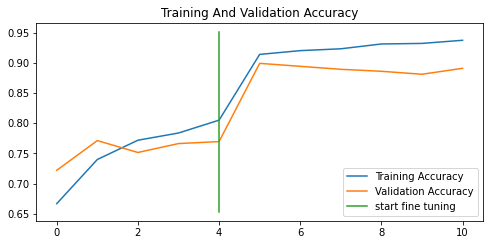

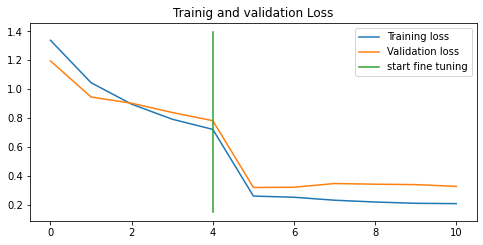

In [ ]:
# let's did fine-tunning with more data?
compare_history(model_2_history,histoy_fine_tuned_all_data,epochs=5)

##Viewing on tenosor board call back

In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub\
  --name "transfer-learning experiment with 10 percent data"\
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning." \
  --one_shot # exist onece upload was finised

My experiment avalible on : https://tensorboard.dev/experiment/la91SxfATgCq1NVqKYx0SA/